# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

# Getting Started
To familiarize yourself with an iPython Notebook, **try double clicking on this cell**. You will notice that the text changes so that all the formatting is removed. This allows you to make edits to the block of text you see here. This block of text (and mostly anything that's not code) is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options! Whether you're editing a Markdown text block or a code block (like the one below), you can use the keyboard shortcut **Shift + Enter** or **Shift + Return** to execute the code or text block. In this case, it will show the formatted text.

Let's start by setting up some code we will need to get the rest of the project up and running. Use the keyboard shortcut mentioned above on the following code block to execute it. Alternatively, depending on your iPython Notebook program, you can press the **Play** button in the hotbar. You'll know the code block executes successfully if the message *"Boston Housing dataset loaded successfully!"* is printed.

In [1]:
# Importing a few necessary libraries
import numpy as np
import matplotlib.pyplot as pl
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

Boston Housing dataset loaded successfully!


# Statistical Analysis and Data Exploration
In this first section of the project, you will quickly investigate a few basic statistics about the dataset you are working with. In addition, you'll look at the client's feature set in `CLIENT_FEATURES` and see how this particular sample relates to the features of the dataset. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand your results.

## Step 1
In the code block below, use the imported `numpy` library to calculate the requested statistics. You will need to replace each `None` you find with the appropriate `numpy` coding for the proper statistic to be printed. Be sure to execute the code block each time to test if your implementation is working successfully. The print statements will show the statistics you calculate!

In [2]:
# Number of houses in the dataset
total_houses = housing_prices.size

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = housing_prices.min()

# Maximum housing value in the dataset
maximum_price = housing_prices.max()

# Mean house value of the dataset
mean_price = housing_prices.mean()

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

Remember, you can **double click the text box below** to add your answer!

**Answer: ** The features I would choose are CRIM, RM, and DIS - the per capita crime rate by town, average number of rooms per dwelling, and weighted distances to five Boston employment centres. These features are pairwise, on the surface, independent of each other. The number of rooms in a dwelling would not typically affect per capita crime rates, and distance to employment centres will not affect number of rooms as well. Furthermore, these features make the most sense - as in their definitions are explicit. I was considering RAD and LSTAT, but I was unable to make sense of the feature definitions because they required me to define what lower status and index of accessibility were.

## Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  
**Hint: ** Run the code block below to see the client's data.

In [5]:
print CLIENT_FEATURES
print CLIENT_FEATURES[0][0], CLIENT_FEATURES[0][5], CLIENT_FEATURES[0][7]

 [[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]
11.95 5.609 1.385


**Answer: ** CRIM: 11.95, RM: 5.609, DIS: 1.385

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!   
Ensure that you have executed the code block once you are done. You'll know the `shuffle_split_data` function is working if the statement *"Successfully shuffled and split the data!"* is printed.

In [8]:
# Put any import statements you need for this code block here
import math

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    if len(X) != len(y):
        return "Dimensions do not match"
    
    # Shuffle and split the data
    a = range(0,len(y))
    np.random.shuffle(a)
    divider = int(math.floor(0.7 * len(X)))
    
    X_train = X[a[0:divider]]
    y_train = y[a[0:divider]]
    X_test = X[a[divider:len(X)]]
    y_test = y[a[divider:len(y)]]

    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test


# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 3
*Why do we split the data into training and testing subsets for our model?*

**Answer: ** Splitting the data into a test and training subset allows us to train our model and test our model on independent data - assuming each trial within the dataset is independent and identically distributed. Since this may not be the case all the time, we shuffle the data first in order to randomize the dataset further. That way, we have a sample for testing and for training that is more representative of the population. If we choose to train and test the dataset on the same data, we would do really well on our test data because the model was trained on the test data, and it would know how to best predict a result given a error metric. In other words, the model would be overfit becuase the training and the test set are the same and we have learned the model specifically for the data set that we are testing on.

## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [10]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """

    error = mean_squared_error(y_true=y_true, y_pred=y_predict)
    return error


# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer: ** The metrics accuracy, precision, recall, and F1 Score all apply to classification tasks. Our goal in this project is to predict house prices, which is not a classification problem but a regression problem. Therefore, our choices come down to MSE and MAE, which are normally used for regression problems because they measure how far off a predicted value is from a true value, not whether the predicted value matches the true value. Between MSE and MAE, I chose MSE because we want to penalize predicted values that are further from the true value even more than predicted values that are closer to the true value. 

Predicting house prices that are way undervalued than the true value will be detrimental because the owner and the real estate agent will not receive an amount close to market value. This could also have the potential of portraying the house in a negative light and may deter potential buyers because they would wonder why the house is valued so low. Also, this valuation may cause neighboring houses' valuations to drop. Therefore, the effects of valuating the house price significantly lower than normal will imply negative consequences to even those not involved in the valuation process. Overpricing the value of the house way above the true value will drive many potential buyers away, and this will consume unnecessary time and resources from the seller and real estate agent to sell the house. Since the potential harm in valuating the house price significantly different from the true value could do more harm than meets than eye, we must avoid pricing the houses this way.

## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [11]:
# Put any import statements you need for this code block
from sklearn import grid_search as g
from sklearn import metrics as m
from sklearn.metrics import mean_squared_error


def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()
    
    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = m.make_scorer(mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = g.GridSearchCV(regressor, param_grid=parameters, scoring=scoring_function)

    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_


# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: ** The grid search algorithm steps through each parameter value given in the param_grid argument and fits the model specified by the estimator argument in order to return the set of parameters that give the lowest error. The model will measure the error on the validation set using cross validation. Because we did not specify a cross validation scheme the default 3-fold cross-validation scheme is used, meaning we train the model 3 times every parameter combination. The grid search algorithm is applicable for any estimator that requires a hyperparameter to be set. That is, it is applicable to any estimator with a parameter that needs to be set apart from the parameters that are learned by the machine learning algorithm itself.

The grid search algorithm searches for the best parameter values exhaustively - it searches over all combination of parameter values and decides on the best set of parameter values according to an error value that is calculated using cross validation.

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: ** Cross validation is the act of partitioning data and reserving some partition for testing the model on while training the model on the other partitions, and doing this exhaustively for all the different ways of partitioning the data using the same method for paritionining the data. After evaluating the error from the test data for all the different combination of training and testing data partitions, we average all the error to obtain a single error value.

Cross validation is helpful when using grid search because we can train and evaluate the model with given parameters on all data points. The advantage of this is that we do not lose data points to partitioning the dataset into smaller sets for training and testing. Furthermore, when applying grid search, cross validation helps us avoid overfitting the model parameter that we are trying to tune from grid search. Since we are capturing the error across all data points in our average, we are not fitting the model parameter to a specific set of datapoints. The averaged error values denote an error value that generalizes to all the observed data points and not a narrow scope of the dataset. Thus, obtaining the parameter values that minimize this averaged value will generalize better to unseen data.

On the other hand, if we withheld a fixed partition of the data for training and testing and only use this partition, we would overfit the trained model with the model parameter we are tuning. This is so because we are deciding on the model parameter that best fits the single test data, which will not be representative of new data. 

Therefore, CV is helpful for a grid search because we do not lose data points for training and testing our model, and we are deciding on a model parameter based on error values that average over all errors taken on test data that generalizes to all the data we have observed.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [12]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.rint(np.linspace(1, len(X_train), 50)).astype(int)
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)
            
            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [13]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


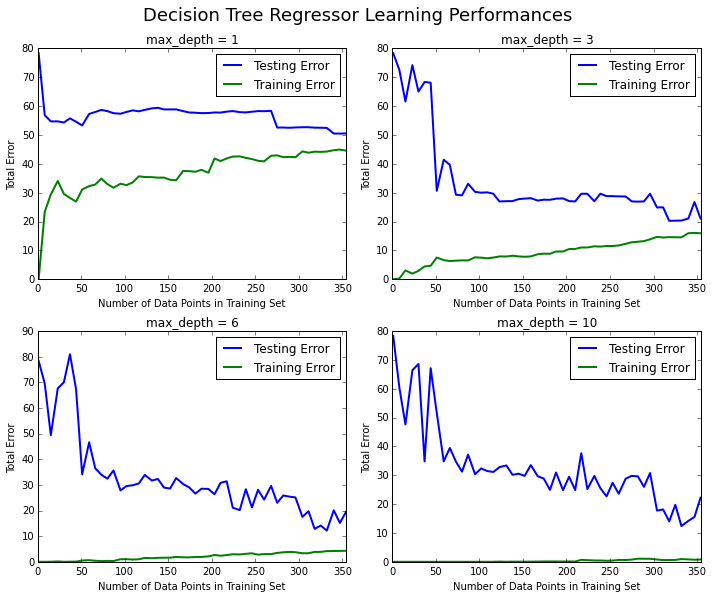

In [14]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: ** For the learning curve depicting the decision tree regressor with max depth of 3, the training error increases as the training set gets larger. The testing error decreases with increasing number of data points in the training set. However, it seems the testing error quickly plateaus with increasing training set and does not go below the training error. In fact, the training error and the testing error both seem to converge to a similar value as the training set increases in number of data points.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: ** When the max depth is 1, the model suffers from high bias because the model training error is large and remains so when the training set increases in number of data points. This shows that the model is not complex enough to accurately capture the underlying trend, regardless of how many data points we train it on. The model does not seem to suffer from high variance at max depth of 1 because we observe the training error and testing error to converge to a similar value. The model seems to predict new data as correctly as the learned training data, and from this we conclude that the the model is not overfitting to particular instances of data. Furthermore, the test error remains consistently flat when given the full dataset. This shows that new data does not affect the performance of the model significantly. Therefore, there isn't much variance in error between samples of testing data.

For the model trained with max depth of 10, the training error seems to rise only a little with increasing data points in the training set. Furthermore, the testing data continues to decrease with more training data. This is indicative that the model is able to capture the underlying trend because with more training data the testing error decreases. Therefore, the model does not exhibit high bias. However, even though the testing error seems to be arriving to a value closer to the training error, the testing error fluctuates even at the point where we have the full training dataset. Therefore, the model exhibits high variance where the model may be overfitted. Furthermore, the difference between the training error and the testing error is still somewhat signficant, illustrating that the model cannot perform as well on new data, because of the overfitting.

Creating a model complexity graph. . . 


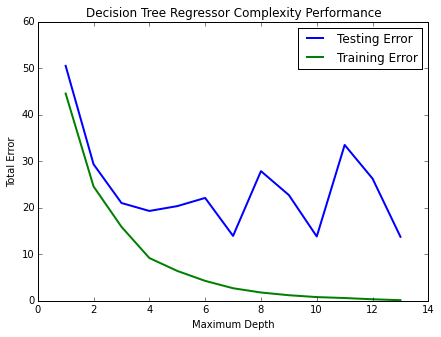

In [16]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: ** The training and testing errors initially decrease with increasing max depth. However, the testing error ceases to decrease monotonically and oscillates between high and low values. This is in contrast to the training error which decreases monotonically and approaches zero.

I believe the max depth of 4 seems to result in the model that best generalizes the dataset. The model's testing error is observed to be at a local minimum. There does exist points where the testing error goes below this local minimum for greater maximum depth, but this may be attributed to the fact that the sample of the dataset that we decided to test on fit particularly well with the overfitted model learned with the greater max depth parameter value. We observe an overfitted model beyond the value of a max depth of 4 because the testing error varies wildly after this point. The testing error is very low at max depth of 7 but rises when max depth is set to 8 and then lowers again when the max depth is at 10. Therefore, we can most likely attribute this to an overfit model.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [22]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 6


**Answer: ** The optimal max depth is 6. This is not too far off from 4, which was my initial intuition of the value given the graph above. There is still a difference in total error between max depth of 6 and 4. As we saw in the graph, max depth of 6 gave a local maximum for testing error and max depth of 4 resulted in a lower testing error. However, max depth of 6 also gave a lower training error, and this decrease in training error seems more significant than the increase in testing error for max depth of 6.

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [23]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 20.766


**Answer: ** The best selling price for the client's home is \$20766. Given that the mean of the houses in the dataset was 22533 and the standard deviation was 9188, the value of 20766 is relatively close to the mean price. The selling price is below the median selling price of \$21200 for the homes in that neighborhood though. This somewhat signifies that the house is either undervalued or is on the lower end. Further exploration of the dataset is required to see where the house price is located among all house prices though.

## Question 12 (Final Question):
*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: ** I would not use this model to predict the selling price of future clients' homes. First, the features involved in training the regressor seem somewhat related. For example, ZN and INDUS could relate to each other and have a confounding variable. ZN is proportion of residential land zoned for lots over 25,000 sq.ft and INDUS is proportion of non-retail business acres per town. Furthermore, on the surface of it, the NOX feature seems irrelevant, and most features are not clearly defined in order to make sense of the data unless we acquire a domain expert. Therefore, I would clean the dataset and remove some features before training the model. Furthermore, a decision tree to act as a regressor seems a bit unordinary. Decision trees seem more appropriate for classification tasks and for categorical features where a criteria to branch on could be made more explicitly. Another issue I find is that the dataset is that there is only 506 data points, and while this may be a compiled list of all houses in the Greater Boston area, this does not seem to adequately supply enough data points for a dataset containing 13 features. I would either try to cut down the set of features I use as I previously mentioned, or I would use a method such as bootstrapping to make the model less prone to overfitting. 